# Pleque - impact angle and related functionality demonstration

Branch feature/filedline_spreading

In [1]:
%pylab notebook 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Use this function to acess COMPASS-U database
from pleque.io.compass import cudb
# Use this function to load testing equilibrium 
from pleque.tests.utils import load_testing_equilibrium

from pleque.core.coordinates import Coordinates
import matplotlib.pyplot as plt
import numpy as np


In [3]:

eq = load_testing_equilibrium(4)

  nx = 129, ny = 129
299 181
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for critical points ---
--- Recognizing equilibrium type ---
>> X-point plasma found.
--- Looking for LCFS: ---
Relative LCFS error: 1.0893335604665209e-12
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [4]:
eq.plot_overview()
plt.show()

<IPython.core.display.Javascript object>

In [5]:
# You can see, there is wrong geometry in the database at the moment: 
eq.plot_geometry()

<IPython.core.display.Javascript object>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1711beb630>,
      dtype=object)

In [6]:
# Coordinates instance of first wall: 
fw = eq.first_wall

# Midplane separatrix-lcfs distance: 
r_mid = eq.r_mid(psi_n = 1, grid=False)
mapped_clearance = fw.r_mid - r_mid


In [7]:
opts = {'vmin': 0, 'vmax': 0.03, 'edgecolors': 'none'}

#ax = axs[0]
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
cl = ax.scatter(fw.R, fw.Z, c=mapped_clearance, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Mapped clearance [m]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')



<IPython.core.display.Javascript object>

Text(0.5, 0, 'R [m]')

## Magnetic field on the FW: 

In [8]:
B_wall = eq.B_abs(fw)


In [9]:
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
# opts = {'vmin': 6.0, 'vmax': 10.0, 'edgecolors': 'none'}
cl = ax.scatter(fw.R, fw.Z, c=B_wall)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic feild on FW [T]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'R [m]')

## Refine the wall using the new methon of resampling: 



In [10]:
#number of points to resample the limiter
npoints=1000

# Resample using new method
coords2=eq.first_wall.resample2(npoints)

# use dir to print all atributes od the Coordinates class
print(dir(coords2))


['R', 'X', 'Y', 'Z', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert_to_default_coord_type', '_coord_type_input', '_eq', '_evaluate_input', '_incompatible_dimension_error', '_valid_coordinates', '_valid_coordinates_1d', '_valid_coordinates_2d', '_valid_coordinates_3d', '_verify_coord_type', '_x1_input', '_x2_input', 'as_array', 'cocos', 'cocos_dict', 'cum_length', 'dim', 'dists', 'grid', 'impact_angle_cos', 'impact_angle_sin', 'impact_angle_sin_pol_projection', 'incidence_angle_cos', 'incidence_angle_sin', 'intersection', 'length', 'line_integral', 'mesh', 'normal_vector', 'phi', 'plot', 'pol_projection_impact_angle_cos', 'psi', 'psi_n', 'r', 'r_mid', 'resample', 'resample2', 'rho', 

 ## Calculate cosinus of impact angle

In [11]:
??coords2.impact_angle_cos()

In [12]:
import pleque.utils.flux_expansions as flux_expansions
flux_expansions.impact_angle_cos??

Object `flux_expansions.impact_angle_cos` not found.


In [13]:
# get normal vector
normal_vecs=coords2.normal_vector()

# get normalised bvec
bvec=eq.Bvec_norm(coords2)

vec=np.linspace(0,0.2,2)

print(bvec.shape)
print(normal_vecs.shape)
# get impact angle sinus

impcos=coords2.impact_angle_sin()

#get only poloidal projection
# get impact angle sinus
impcospol=coords2.impact_angle_sin_pol_projection()


(3, 1000)
(3, 1000)


In [14]:
## Display limiter normal angles vs impact angles

In [15]:
fign, axn = plt.subplots()

axn.plot(eq.first_wall.R, eq.first_wall.Z, lw=2, color='c')

axn.set_aspect('equal')

#plot normal vectors
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+normal_vecs[0, i]*vec,
             coords2.Z[i]+normal_vecs[1, i]*vec, color='k')
    
#plot b vectors
    
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+bvec[0, i]*vec, 
             coords2.Z[i]+bvec[1, i]*vec,color='r')
    

grid = eq.grid(resolution=[1e-3, 2e-3], dim="step")

cl = axn.contour(grid.R, grid.Z, grid.psi_n, 400, alpha=0.5)

axn.set_xlim(0.43,0.55)
axn.set_ylim(-0.37,-0.3)

<IPython.core.display.Javascript object>

(-0.37, -0.3)

## Display limiter impact angle cosine

In [16]:
fig, ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R, coords2.Z, c=np.abs(impcos))
im = plt.colorbar(mappable=cl, ax=ax, label='Impact angle sinus')
ax.contour(grid.R, grid.Z, grid.psi_n, 50, alpha=0.5)

ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

<IPython.core.display.Javascript object>

In [17]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R, coords2.Z, c=np.abs(impcospol))
im = plt.colorbar(mappable=cl, ax=ax, label='Impact angle pol projection sine')

ax.contour(grid.R, grid.Z, grid.psi_n, 60, alpha=0.5)
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

<IPython.core.display.Javascript object>

In [32]:
# Poloidal field exp. coef
fx =eq.poloidal_mag_flux_exp_coef(coords2)
# Poloidal field exp. coef with projection to the target
fx_eff=eq.effective_poloidal_mag_flux_exp_coef(coords2)

<IPython.core.display.Javascript object>


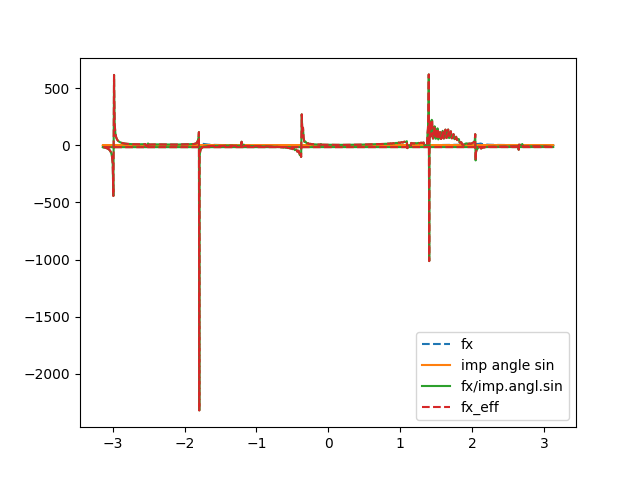

In [34]:
in_angle = coords2.impact_angle_sin_pol_projection()

plt.figure()
plt.plot(coords2.theta, fx, '--', label='fx')
plt.plot(coords2.theta, in_angle, label='imp angle sin')
plt.plot(coords2.theta, fx/in_angle, label='fx/imp.angl.sin')
plt.plot(coords2.theta, fx_eff, '--', label='fx_eff')
plt.legend()

<IPython.core.display.Javascript object>


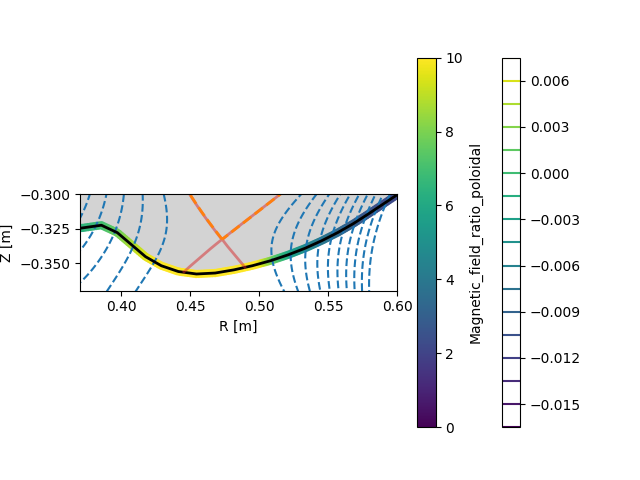

<IPython.core.display.Javascript object>


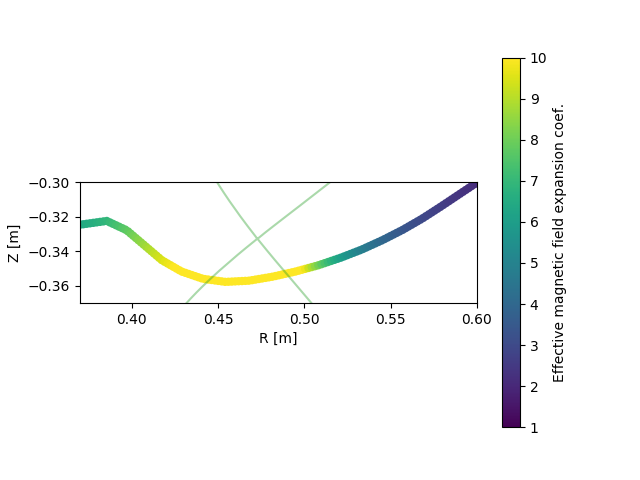

<IPython.core.display.Javascript object>


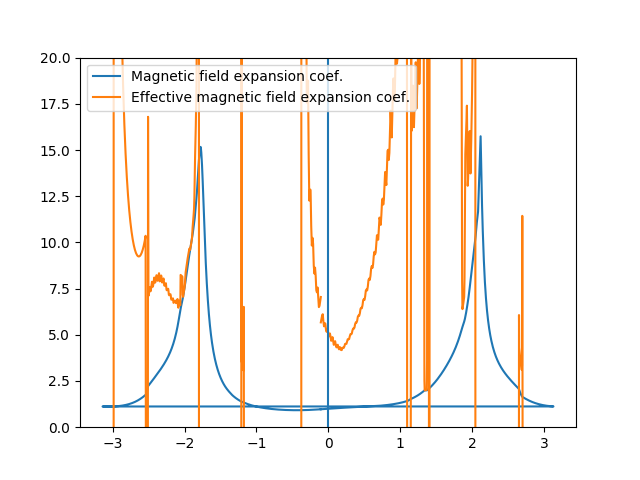

(0, 20)

In [31]:
fig,ax=plt.subplots()


eq.plot_overview(ax=ax)
ax.set_aspect('equal')

#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 10, 'edgecolors': 'none'}

cl = ax.scatter(coords2.R, coords2.Z, c=ratio, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic_field_ratio_poloidal')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

plt.show()


fig,ax=plt.subplots()

ax.set_aspect('equal')

#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 1, 'vmax': 10, 'edgecolors': 'none'}

cl = ax.scatter(coords2.R, coords2.Z, c=ratio, **opts)

eq.separatrix.plot(color='C2', alpha=0.4)
im = plt.colorbar(mappable=cl, ax=ax, label='Effective magnetic field expansion coef.')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

plt.show()



plt.figure()
plt.plot(coords2.theta, ratio, label='Magnetic field expansion coef.')
plt.plot(coords2.theta, ratio2, label='Effective magnetic field expansion coef.')
plt.axvline()
plt.legend()
plt.ylim(0, 20)

In [21]:
flux_exp_coef=ratio/np.abs(impcos)

In [22]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 0.0025, 'edgecolors': 'none'} #

cl = ax.scatter(coords2.R, coords2.Z, c=flux_exp_coef,marker='s',**opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Total coeff cos* flux expansion')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

ax.contour(grid.R, grid.Z, grid.psi_n, 600, alpha=0.5)

plt.show()

<IPython.core.display.Javascript object>

ValueError: 'c' argument has 1000 elements, which is not acceptable for use with 'x' with size 999, 'y' with size 999.

In [ ]:
flux_exp_coef=ratio2*np.abs(impcospol)

In [ ]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 0.25, 'edgecolors': 'none'} #

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=flux_exp_coef,marker='s',**opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Total coeff pol variant')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

ax.contour(grid.R, grid.Z, grid.psi_n, 600, alpha=0.5)

plt.show()